# Homework X: Activation Function

Welcome to the course **AI and Deep learning**!

In the neural networks introduced earlier, the **activation function** mentioned acts as a non-linear transformation of the result of a linear transformation, which is the key to the neural network model capturing and representing complex data and functional relationships in the real world. In this assignment, we will learn to understand the main responsibilities of activation functions, recognise common activation functions and also learn how to implement them in code and how to choose different activation functions. Hope you enjoy this homework! 

**Learning Goal**: In this homework, We will learn about the activation functions. After this homework, you will know:
 * Main responsibilities of the activation function.
 * Understand the forms, derivatives, advantages and disadvantages of common activation functions and their scope of application.
 * How to code up common activation functions.
 * How to choose the right activation function.

## Table of content
* [1 - Packages](#1)
* [2 - Compute an activation function](#2)
  * [2.1 - Sigmoid Activation Function](#2.1)
  * [2.2 - Tanh Activation Function](#2.2)
  * [2.3 - ReLU Activation Function](#2.3)
  * [2.4 - Leaky ReLU Activation Function](#2.4)
  * [2.5 - Play by yourself!](#2.5)

<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages. Again, one of the commonly used package is **numpy**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plots

## 2 - Compute an activation function

<a name='2.1'></a>
### 2.1 - Sigmoid Activation Function

Sigmoid activation functions used to be widely used in neural networks due to their simplicity and smooth output.The Sigmoid function is an effective choice in dealing with binary classification problems and specific applications that require probabilistic outputs.

**Form**：
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Range**：$(0, 1)$

**Derivative**：
$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
$$

First, we generate some equally spaced points in preparation for drawing the function image later.

In [2]:
# Generate data points
x = np.linspace(-10, 10, 400)  # Generate 400 points between -10 and 10

In the following cell, you should write the function form given above. 

In [3]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def sigmoid(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = 1.0 / (1.0 + np.exp(-x))
    ### YOUR CODE ENDS HERE
    
    return y

# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def sigmoid_derivative(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 2 lines)
    sig = sigmoid(x)
    y = sig * (1 - sig)
    ### YOUR CODE ENDS HERE
    
    return y

To see if you've typed the activation function correctly in code, you might want to run the code below and compare the function image you get with the function image on slides.

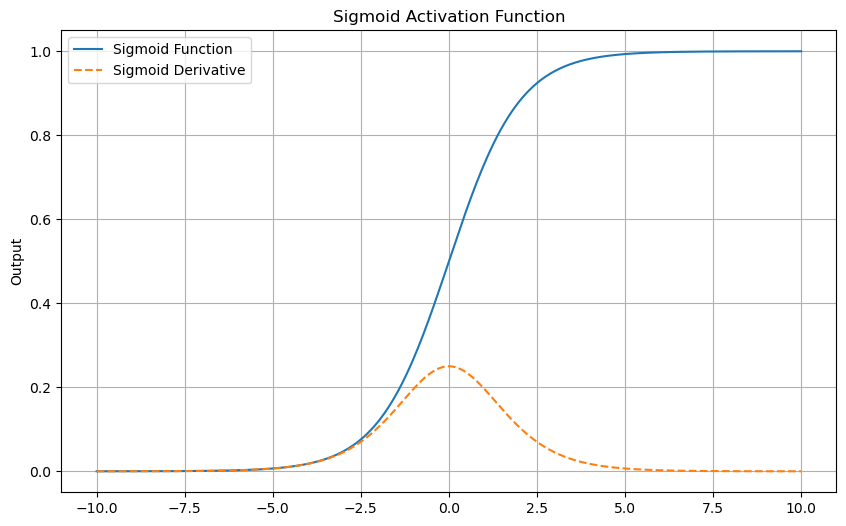

In [4]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Plotting sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid(x), label="Sigmoid Function")
plt.plot(x, sigmoid_derivative(x), label="Sigmoid Derivative", linestyle="--")
plt.title("Sigmoid Activation Function")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

**Advantages**: (1) The sigmoid function is suitable for application in binary classification problems because its output value domain is (0, 1) and it can interpret the output value as a probability; (2) For outliers, its corresponding gradient is close to 0, which helps to accelerate the learning in the early stage of the training; and (3) The derivative is simple to solve.

**Disadvantages**:(1)Gradient vanishing problem; (2)Output is not centred on 0; (3)Activation function is computationally intensive.

 In order to overcome some of the drawbacks of the Sigmoid function, scholars have proposed to utilise the Tanh function as an activation function.

<a name='2.2'></a>
### 2.2 - Tanh Activation Function

The Tanh function has an output value domain of (-1, 1) and its output is centred on 0, which helps to speed up the convergence of the neural network. 

**Form**：
$$
\sigma(z) = \frac{2}{1 +  e^{-2z}} - 1
$$

**Range**：$(-1, 1)$

**Derivative**：
$$
\sigma'(z) = 1 - \sigma(z)^2
$$

In the following cell, you should write the function form given above. You are expected to write the code following the function form on your own, rather than calling np.tanh() directly.

In [5]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def tanh(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = 2.0 / (1.0 + np.exp(-2.0 * x)) - 1.0
    ### YOUR CODE ENDS HERE
    
    return y

# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def tanh_derivative(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = 1 - tanh(x) ** 2
    ### YOUR CODE ENDS HERE
    
    return y

To see if you've typed the activation function correctly in code, you might want to run the code below and compare the function image you get with the function image on slides.

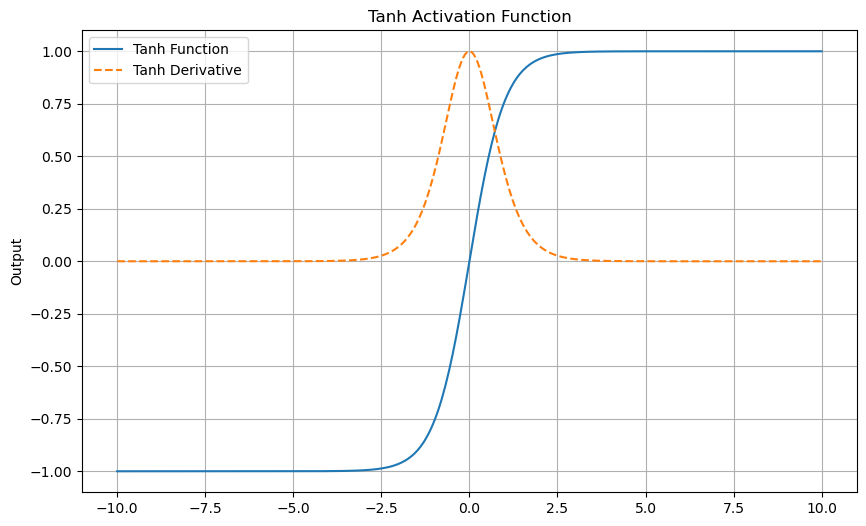

In [6]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Plotting tanh function
plt.figure(figsize=(10, 6))
plt.plot(x, tanh(x), label="Tanh Function")
plt.plot(x, tanh_derivative(x), label="Tanh Derivative", linestyle="--")
plt.title("Tanh Activation Function")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

**Advantages**: (1) output values are centrally symmetric: the output values of the tanh function are in the range of (-1, 1), a property that makes the output values of the tanh function centred on zero, which helps the optimisation process and ensures that the mean of the activation values is close to zero; (2) the gradient of the tanh function is steeper in the intermediate range, which is particularly beneficial for the learning process; (3) the tanh function is symmetric about the origin, and this symmetry can help the training process converge faster.

**Disadvantages**: (1) gradient vanishing problem: when the input values are at extremes (very large or very small), the gradient also becomes very small, thus slowing down the learning of the deep network; (2) the activation function is computationally intensive; (3) not applicable to sparse activation: unlike ReLU, which will be described below, tanh does not naturally encourage sparse activation (i.e., many of the activation values are zero). 

Sparse activations may be beneficial in some types of neural networks (such as those used in computer vision).

<a name='2.3'></a>
### 2.3 - ReLU Activation Function

The ReLU (Rectified Linear Unit) activation function has become a widely used activation function in deep learning due to its computational simplicity, efficiency, and the fact that it helps to alleviate the gradient vanishing problem.

**Form**：
$$
\text{ReLU}(z) = \max(0, z)
$$

**Range**：$[0, +\infty)$

**Derivative**：
$$
\text{ReLU}'(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases}
$$

**PS**: The ReLU activation function is not derivable at z = 0, but we usually define the ‘derivative’ at this point as 0 in practice.

In the following cell, you should write the function form given above. 

In [7]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def ReLU(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = np.where(x < 0, 0, x)
    ### YOUR CODE ENDS HERE
    
    return y

# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def ReLU_derivative(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = np.where(x > 0, 1, 0)
    ### YOUR CODE ENDS HERE
    
    return y

To see if you've typed the activation function correctly in code, you might want to run the code below and compare the function image you get with the function image on slides.

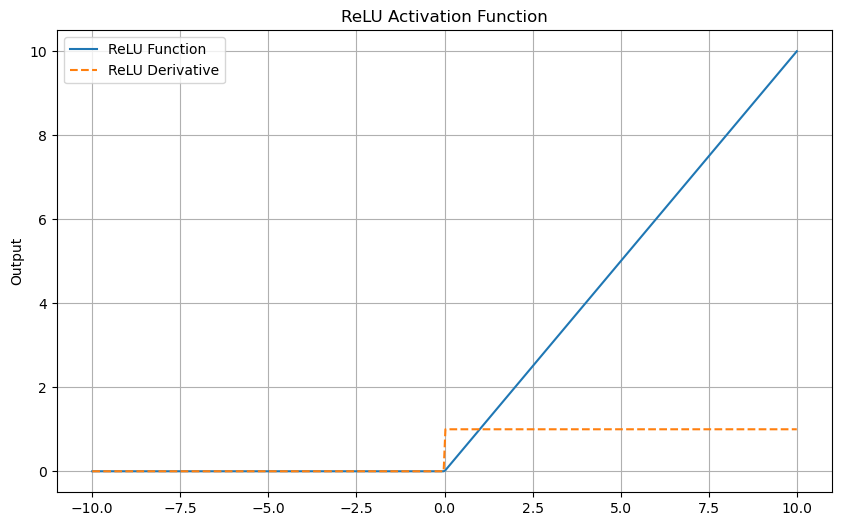

In [8]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Plotting ReLU function
plt.figure(figsize=(10, 6))
plt.plot(x, ReLU(x), label="ReLU Function")
plt.plot(x, ReLU_derivative(x), label="ReLU Derivative", linestyle="--")
plt.title("ReLU Activation Function")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

**Advantages**: (1) computationally simple and efficient; (2) mitigates the gradient vanishing problem; (3) sparse activation: the ReLU function outputs all negative values as zero, which results in a portion of the neurons not being activated at any given time, and this sparse activation helps to increase the computational efficiency of the network and reduces overfitting; and (4) fast convergence: a neural network using the ReLU activation function can usually converge faster because the gradient does not saturate in positive intervals.

**Disadvantages**: (1) Dying ReLU problem: If the weights of a neuron are updated to negative values during the training process, the neuron may never be activated (the output will always be zero), which is called the ‘Dying ReLU’ problem, and it may lead to the failure of some neurons during the whole training process; (2) Asymmetric output;(3) non-trivial point: at x=0, the ReLU function is non-trivial.

<a name='2.4'></a>
### 2.4 - Leaky ReLU Activation Function

The Leaky ReLU (Leaky Rectified Linear Unit) function is a simple improvement on the ReLU function. Instead of setting the output to zero when the input is negative, the Leaky ReLU function multiplies the input by a small positive number (e.g. 0.01) to get a non-zero output. In this way, the Leaky ReLU function ensures that the gradient does not vanish even if the input is negative.

**Form**：
$$
\text{Leaky ReLU}(z) = \begin{cases}
x & \text{if } z \geq 0 \\
\alpha z & \text{if } z < 0
\end{cases}
$$

where $\alpha$ is a small positive number (e.g. 0.01).

**Range**：$(-\infty, +\infty)$

**Derivative**：
$$
\text{Leaky ReLU}'(z) = \begin{cases}
1 & \text{if } z > 0 \\
\alpha & \text{if } z < 0
\end{cases}
$$

**PS**: The Leaky ReLU activation function is not derivable at z = 0, but we usually define the ‘derivative’ at this point as $\alpha$ in practice.

In the following cell, you should write the function form given above. 

In [9]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def leaky_relu(x, alpha=0.01):
    # x: input
    # alpha: small positive number
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = np.where(x >= 0, x, alpha * x)
    ### YOUR CODE ENDS HERE
    
    return y

# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def leaky_relu_derivative(x, alpha=0.01):
    # x: input
    # alpha: small positive number
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = np.where(x > 0, 1, alpha)
    ### YOUR CODE ENDS HERE
    
    return y

To see if you've typed the activation function correctly in code, you might want to run the code below and compare the function image you get with the function image on slides.

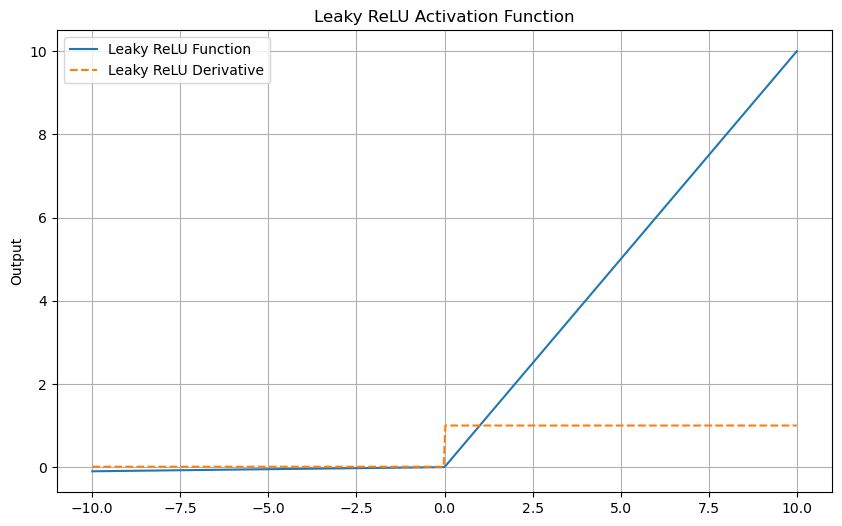

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Plotting Leaky ReLU function
plt.figure(figsize=(10, 6))
plt.plot(x, leaky_relu(x), label="Leaky ReLU Function")
plt.plot(x, leaky_relu_derivative(x), label="Leaky ReLU Derivative", linestyle="--")
plt.title("Leaky ReLU Activation Function")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

**Advantages**: (1) Solve the Dying ReLU problem: Leaky ReLU avoids the Dying ReLU problem by using a very small slope when the input is less than or equal to zero , which makes the neurons maintain a certain activation even when the input is negative; (2) Simple computation; (3) Avoiding sparse activation: because Leaky ReLU has a small slope in the negative interval, it avoids excessive sparse activation, which helps to keep the model expressive. slope, overly sparse activation is avoided, which helps to maintain the expressiveness of the model; (4) better gradient flow: Leaky ReLU has a non-zero gradient in the negative interval, which allows the gradient to flow better during backpropagation, which helps in the training of deeper neural networks.

**Disadvantages**: (1) Fixed parameter$\alpha$: Choosing a suitable$\alpha$ may require some experiments, especially for different tasks and datasets. ; (2) Asymmetric output: although the output range of Leaky ReLU is$(-\infty, +\infty)$, it is not zero-centred. This means that it is not zero-centred. This may lead to a reduction in the efficiency of parameter updates during training; (3) Possible introduction of negative value effects: despite being very small Leaky ReLU's output in the negative interval is still negative, which may have a negative impact on model performance in some cases.

<a name='2.5'></a>
### 2.5 - Play by yourself!

When choosing an activation function, we need to consider several factors. 
* Firstly, we need to choose the appropriate activation function according to the specific application scenario.
* Secondly, we need to consider the gradient characteristics of the activation function.
* Finally, we also need to consider the computational efficiency and stability of the activation function.

Overall, choosing the activation function is a key step in neural network design, which needs to be decided in combination with specific application scenarios, data characteristics, and experimental results. By default, ReLU and its variants are better starting points, but using other activation functions such as Sigmoid, Tanh, or Softmax may be more appropriate in specific situations.

In previous assignments we have coded up a neural network with one hidden layer. we have used sigmoid activation function, can we change it to some other activation function? You can try it yourself with other activation functions written above!